### Titanic - Machine Learning from Disaster

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import ensemble
from sklearn import svm
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the full training and test data
train_df = pd.read_csv("train.csv", index_col='PassengerId')
test_df = pd.read_csv("test.csv", index_col='PassengerId')

y = train_df["Survived"]

### Distribution of Labels

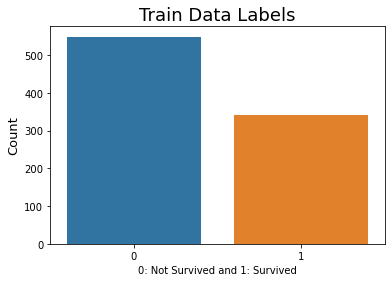

In [3]:
b = sns.countplot(x='Survived', data=train_df)
b.set_title('Train Data Labels', fontsize=18)
b.set_ylabel("Count", fontsize=13)
b.set_xlabel("0: Not Survived and 1: Survived");

In [4]:
train_df = train_df.drop(['Survived'], axis=1)

all_df = pd.concat([train_df, test_df])
all_df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


### Feature Engineering

In [5]:
import xgboost as xgb
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

In [6]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Name      1309 non-null   object 
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Ticket    1309 non-null   object 
 7   Fare      1308 non-null   float64
 8   Cabin     295 non-null    object 
 9   Embarked  1307 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 112.5+ KB


In [7]:
# too many missing values
all_df.drop(columns='Cabin', inplace=True)

In [8]:
print("mean:", all_df["Age"].mean())
print("median:", all_df["Age"].median())
all_df["Age"] = all_df["Age"].fillna(all_df["Age"].mean())
all_df["Fare"] = all_df["Fare"].fillna(all_df["Fare"].median())

mean: 29.881137667304014
median: 28.0


In [9]:
all_df.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked'],
      dtype='object')

In [10]:
# splitting Name column 

# all_df["Title"] = (all_df.Name.str.split(pat=',', n=2, expand=True)[1]).str.split(pat='.', n=2, expand=True)[0]
# all_df["Name"] = all_df.Name.str.split(pat=',', n=2, expand=True)[0]

# all_df

In [11]:
# making a feature list
features = [
    f for f in all_df.columns if f not in ('PassengerId', 'Survived', 'Ticket', 'Name')
]

features

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [12]:
all_df[features]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,male,22.000000,1,0,7.2500,S
2,1,female,38.000000,1,0,71.2833,C
3,3,female,26.000000,0,0,7.9250,S
4,1,female,35.000000,1,0,53.1000,S
5,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...
1305,3,male,29.881138,0,0,8.0500,S
1306,1,female,39.000000,0,0,108.9000,C
1307,3,male,38.500000,0,0,7.2500,S


### One-hot Encoding

In [13]:
all_df = pd.get_dummies(all_df[features])
all_df

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,3,22.000000,1,0,7.2500,0,1,0,0,1
2,1,38.000000,1,0,71.2833,1,0,1,0,0
3,3,26.000000,0,0,7.9250,1,0,0,0,1
4,1,35.000000,1,0,53.1000,1,0,0,0,1
5,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1305,3,29.881138,0,0,8.0500,0,1,0,0,1
1306,1,39.000000,0,0,108.9000,1,0,1,0,0
1307,3,38.500000,0,0,7.2500,0,1,0,0,1


In [14]:
features = all_df.columns.to_list()
features

['Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Sex_female',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S']

In [15]:
train_df = all_df[0:891]

x_test = all_df[891:1309]

### Creating train and validation data

In [16]:
X_train, X_valid, y_train, y_valid = train_test_split(train_df, y, test_size=0.25, random_state=42)

### Hyper-parameter Optimization

In [17]:
import optuna
from tqdm.auto import tqdm

def objective(trial):
    xgb_params = dict(
        max_depth=trial.suggest_int("max_depth", 2, 10),
        learning_rate=trial.suggest_float("learning_rate", 1e-4, 1e-1, log=True),
        n_estimators=trial.suggest_int("n_estimators", 1000, 8000),
        min_child_weight=trial.suggest_int("min_child_weight", 1, 10),
        colsample_bytree=trial.suggest_float("colsample_bytree", 0.2, 1.0),
        subsample=trial.suggest_float("subsample", 0.2, 1.0),
        reg_alpha=trial.suggest_float("reg_alpha", 1e-4, 1e2, log=True),
        reg_lambda=trial.suggest_float("reg_lambda", 1e-4, 1e2, log=True),
    )
    xgbc = xgb.XGBClassifier(**xgb_params)
    
    #Train the model using the training sets
    xgbc.fit(X_train, y_train)
    # print(model.feature_importances_)

    #Predict the response for test dataset
    y_pred = xgbc.predict(X_valid)
    print(metrics.accuracy_score(y_valid, y_pred))
    
    return metrics.accuracy_score(y_valid, y_pred)


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)
xgb_best_params = study.best_params

[I 2022-12-25 15:08:19,526] A new study created in memory with name: no-name-316eebbc-762a-454a-ad71-7f07ad8d9507


[15:08:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 15:08:22,678] Trial 0 finished with value: 0.8026905829596412 and parameters: {'max_depth': 3, 'learning_rate': 0.0002131606983440818, 'n_estimators': 2907, 'min_child_weight': 5, 'colsample_bytree': 0.6174658728714801, 'subsample': 0.4419703533406345, 'reg_alpha': 0.19060122621687506, 'reg_lambda': 0.0006980132148277114}. Best is trial 0 with value: 0.8026905829596412.


0.8026905829596412
[15:08:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 15:08:27,382] Trial 1 finished with value: 0.7892376681614349 and parameters: {'max_depth': 6, 'learning_rate': 0.06412470446453644, 'n_estimators': 3745, 'min_child_weight': 1, 'colsample_bytree': 0.7464932629939087, 'subsample': 0.6260324187039041, 'reg_alpha': 0.016875775049959327, 'reg_lambda': 0.00040463733407012124}. Best is trial 0 with value: 0.8026905829596412.


0.7892376681614349
[15:08:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 15:08:29,298] Trial 2 finished with value: 0.8071748878923767 and parameters: {'max_depth': 6, 'learning_rate': 0.00013768524996804295, 'n_estimators': 1483, 'min_child_weight': 3, 'colsample_bytree': 0.8971003211780675, 'subsample': 0.9959435663495333, 'reg_alpha': 2.851369620824857, 'reg_lambda': 2.9298509278870117}. Best is trial 2 with value: 0.8071748878923767.


0.8071748878923767
[15:08:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 15:08:37,983] Trial 3 finished with value: 0.820627802690583 and parameters: {'max_depth': 9, 'learning_rate': 0.04055221920978258, 'n_estimators': 7784, 'min_child_weight': 2, 'colsample_bytree': 0.6945943914895759, 'subsample': 0.5048660572605113, 'reg_alpha': 0.0006256946236235881, 'reg_lambda': 60.69857050381173}. Best is trial 3 with value: 0.820627802690583.


0.820627802690583
[15:08:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 15:08:42,522] Trial 4 finished with value: 0.600896860986547 and parameters: {'max_depth': 9, 'learning_rate': 0.0014557009430882818, 'n_estimators': 4837, 'min_child_weight': 8, 'colsample_bytree': 0.9015878184034116, 'subsample': 0.7645009788295354, 'reg_alpha': 84.63262768077603, 'reg_lambda': 0.036350337985815134}. Best is trial 3 with value: 0.820627802690583.


0.600896860986547
[15:08:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 15:08:47,262] Trial 5 finished with value: 0.8071748878923767 and parameters: {'max_depth': 3, 'learning_rate': 0.004415931984893069, 'n_estimators': 4849, 'min_child_weight': 4, 'colsample_bytree': 0.8033861700936937, 'subsample': 0.4323832543458309, 'reg_alpha': 8.082293730471811, 'reg_lambda': 1.4080386960934441}. Best is trial 3 with value: 0.820627802690583.


0.8071748878923767
[15:08:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 15:08:53,098] Trial 6 finished with value: 0.8026905829596412 and parameters: {'max_depth': 6, 'learning_rate': 0.08852243492972715, 'n_estimators': 6842, 'min_child_weight': 7, 'colsample_bytree': 0.6843550508898948, 'subsample': 0.8527584062104612, 'reg_alpha': 20.637020530887725, 'reg_lambda': 0.006639045398485626}. Best is trial 3 with value: 0.820627802690583.


0.8026905829596412
[15:08:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 15:08:57,072] Trial 7 finished with value: 0.7847533632286996 and parameters: {'max_depth': 9, 'learning_rate': 0.0004727789045708788, 'n_estimators': 4027, 'min_child_weight': 10, 'colsample_bytree': 0.7804245605730162, 'subsample': 0.6541373836717016, 'reg_alpha': 1.788663596475821, 'reg_lambda': 91.57449748187368}. Best is trial 3 with value: 0.820627802690583.


0.7847533632286996
[15:08:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 15:08:58,658] Trial 8 finished with value: 0.7847533632286996 and parameters: {'max_depth': 2, 'learning_rate': 0.0007038501676466787, 'n_estimators': 1528, 'min_child_weight': 10, 'colsample_bytree': 0.6585383053309934, 'subsample': 0.6997255086722963, 'reg_alpha': 0.0022743525138512804, 'reg_lambda': 0.0298834813092928}. Best is trial 3 with value: 0.820627802690583.


0.7847533632286996
[15:08:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 15:09:01,098] Trial 9 finished with value: 0.8340807174887892 and parameters: {'max_depth': 8, 'learning_rate': 0.034222282535874206, 'n_estimators': 2248, 'min_child_weight': 7, 'colsample_bytree': 0.8333823717424944, 'subsample': 0.9598363126679592, 'reg_alpha': 3.2824085534898444, 'reg_lambda': 0.0061166318065493264}. Best is trial 9 with value: 0.8340807174887892.


0.8340807174887892
[15:09:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 15:09:04,037] Trial 10 finished with value: 0.7937219730941704 and parameters: {'max_depth': 10, 'learning_rate': 0.011131071292521322, 'n_estimators': 2631, 'min_child_weight': 7, 'colsample_bytree': 0.4301841967233117, 'subsample': 0.24316321947623232, 'reg_alpha': 0.16214792340671785, 'reg_lambda': 0.7255277218926954}. Best is trial 9 with value: 0.8340807174887892.


0.7937219730941704
[15:09:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 15:09:13,957] Trial 11 finished with value: 0.820627802690583 and parameters: {'max_depth': 8, 'learning_rate': 0.022056731581661455, 'n_estimators': 7930, 'min_child_weight': 2, 'colsample_bytree': 0.4695191856167744, 'subsample': 0.4769245483213586, 'reg_alpha': 0.0001659599621399118, 'reg_lambda': 50.83107611377036}. Best is trial 9 with value: 0.8340807174887892.


0.820627802690583
[15:09:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 15:09:21,773] Trial 12 finished with value: 0.820627802690583 and parameters: {'max_depth': 8, 'learning_rate': 0.02179072883939284, 'n_estimators': 6624, 'min_child_weight': 6, 'colsample_bytree': 0.26633189971233023, 'subsample': 0.90783458597872, 'reg_alpha': 0.00011863608118362534, 'reg_lambda': 0.0029543976305931884}. Best is trial 9 with value: 0.8340807174887892.


0.820627802690583
[15:09:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 15:09:30,356] Trial 13 finished with value: 0.8161434977578476 and parameters: {'max_depth': 8, 'learning_rate': 0.004735798734053586, 'n_estimators': 6027, 'min_child_weight': 4, 'colsample_bytree': 0.9993416359103235, 'subsample': 0.5307433343055554, 'reg_alpha': 0.004765236299488483, 'reg_lambda': 0.203855458605523}. Best is trial 9 with value: 0.8340807174887892.


0.8161434977578476
[15:09:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 15:09:40,561] Trial 14 finished with value: 0.7847533632286996 and parameters: {'max_depth': 10, 'learning_rate': 0.034586485310271246, 'n_estimators': 7874, 'min_child_weight': 1, 'colsample_bytree': 0.5228331981537627, 'subsample': 0.31796951686580643, 'reg_alpha': 0.5516043301657978, 'reg_lambda': 0.00012309145231832275}. Best is trial 9 with value: 0.8340807174887892.


0.7847533632286996
[15:09:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 15:09:43,888] Trial 15 finished with value: 0.8340807174887892 and parameters: {'max_depth': 7, 'learning_rate': 0.009571289530880104, 'n_estimators': 2427, 'min_child_weight': 8, 'colsample_bytree': 0.8496568254670985, 'subsample': 0.7725761560397033, 'reg_alpha': 0.0009424209965890297, 'reg_lambda': 7.439312502294768}. Best is trial 9 with value: 0.8340807174887892.


0.8340807174887892
[15:09:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 15:09:47,010] Trial 16 finished with value: 0.8340807174887892 and parameters: {'max_depth': 5, 'learning_rate': 0.009934845494427809, 'n_estimators': 2363, 'min_child_weight': 8, 'colsample_bytree': 0.875463094603872, 'subsample': 0.8104277608647859, 'reg_alpha': 0.026613194464580176, 'reg_lambda': 3.928441393268503}. Best is trial 9 with value: 0.8340807174887892.


0.8340807174887892
[15:09:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 15:09:48,530] Trial 17 finished with value: 0.820627802690583 and parameters: {'max_depth': 5, 'learning_rate': 0.010044394152400446, 'n_estimators': 1088, 'min_child_weight': 9, 'colsample_bytree': 0.9956102686138697, 'subsample': 0.9810356167464421, 'reg_alpha': 0.021134805485796895, 'reg_lambda': 0.14366775512662028}. Best is trial 9 with value: 0.8340807174887892.


0.820627802690583
[15:09:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 15:09:52,391] Trial 18 finished with value: 0.8026905829596412 and parameters: {'max_depth': 4, 'learning_rate': 0.00238566246640944, 'n_estimators': 3325, 'min_child_weight': 9, 'colsample_bytree': 0.8920303674559452, 'subsample': 0.7955395077268274, 'reg_alpha': 0.02953043403075206, 'reg_lambda': 9.34059103823731}. Best is trial 9 with value: 0.8340807174887892.


0.8026905829596412
[15:09:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-25 15:09:55,047] Trial 19 finished with value: 0.8295964125560538 and parameters: {'max_depth': 5, 'learning_rate': 0.018141626594381947, 'n_estimators': 2211, 'min_child_weight': 6, 'colsample_bytree': 0.31393296670674764, 'subsample': 0.9117683567858362, 'reg_alpha': 0.7202146476437279, 'reg_lambda': 0.00813447913185434}. Best is trial 9 with value: 0.8340807174887892.


0.8295964125560538


### Test data prediction

In [19]:
# Evaluating the best model on test set

# load the full training data with folds
df_train = all_df[0:891]
df_test = x_test

y_train = y

x_train = df_train[features]
x_test = df_test[features]
# n_jobs=-1,max_depth=11,n_estimators=250, verbosity = 0
best_classsifier=xgb.XGBClassifier(**xgb_best_params)
y_pred = best_classsifier.fit(x_train,y_train).predict(x_test)

[15:09:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


### Feature importance

<AxesSubplot:>

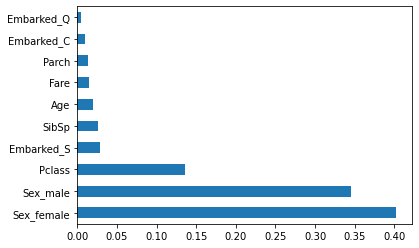

In [20]:
%matplotlib inline 
(pd.Series(best_classsifier.feature_importances_, index=features)
   .nlargest(20)
   .plot(kind='barh'))

### Preparing the submission file

In [21]:
df_test.reset_index(inplace=True)

submission = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],
        "Survived": y_pred
    })

In [22]:
submission.to_csv('submission.csv', index=False)